<a href="https://colab.research.google.com/github/lrrong2020/A/blob/main/AI_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ssmresearch/hanminor/main/cars.csv')

**1. How many records?**

In [2]:
# Count the records
num_records = len(df)
print(num_records)

74


**2. How many variables?**

In [3]:
# Count the variables/columns
num_variables = df.shape[1]
print(num_variables)

10


**3. What are the minimum, mean, and maximum values of those variables?**

In [5]:
stats = df.describe().loc[['min', 'mean', 'max']]
print(stats)

             price    mileage    repair  headspace  trunkspace       weight  \
min    3291.000000   4.800000  1.000000   3.750000  140.000000   792.000000   
mean   6165.256757   8.518919  3.391892   7.483108  385.189189  1358.756757   
max   15906.000000  16.400000  5.000000  12.500000  644.000000  2178.000000   

          length  turningcircle  gear_ratio  
min   355.000000          9.450    2.190000  
mean  469.831081         12.095    3.014865  
max   582.500000         15.560    3.890000  


**4. Determine the "label" variable, for example “origin”.**

In [6]:
label = 'origin'

**5. Normalize the file (excluding the "label" variable!). The resulting values of all variables should
be in the range from 0 to 1.**

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize, excluding 'origin'
features_to_normalize = df.columns.drop(label)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

**6. Create a training and test set. Use 80% of the records for the training set. The data may be
sorted by important characteristics!**

In [8]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop(label, axis=1)
y = df[label]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#sort data by important characteristics

**7. Determine k for the kNN method.**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Range of k to try
k_range = range(1, 26)

# Store average scores for each k
k_scores = []

# Use 10-fold cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Determine the best k
best_k = np.argmax(k_scores) + 1  # Adding 1 because index in Python starts from 0

**8. Train the model, and evaluate the model: how good are the predictions in the test set?**

In [ ]:
# Train the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 3  1]
 [ 0 11]]
              precision    recall  f1-score   support

       other       1.00      0.75      0.86         4
         usa       0.92      1.00      0.96        11

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15

Accuracy: 0.9333333333333333


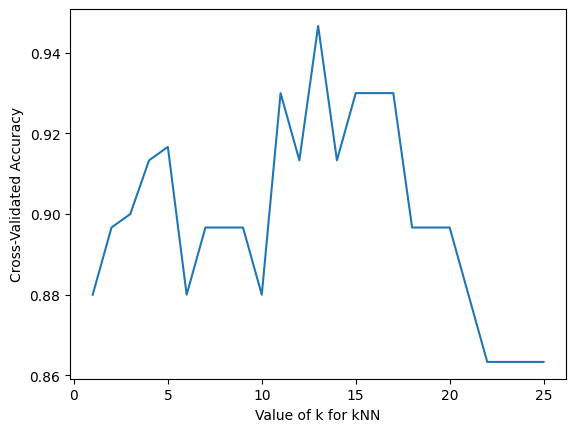

In [ ]:
import matplotlib.pyplot as plt

# Plot the k values and their corresponding accuracy scores
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

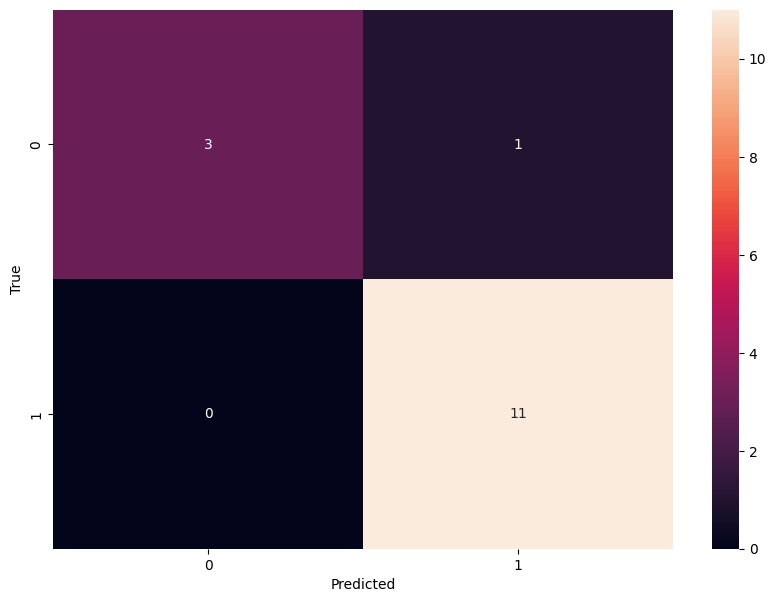

In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**9. What are possible improvements in the model?**